## Data Dictionary
 -- id (Unique id for each patient)
-- age (Age of the patient in years)
-- origin (place of study)
-- sex (Male/Female)
-- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
-- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
-- chol (serum cholesterol in mg/dl)
-- fbs (if fasting blood sugar > 120 mg/dl)
-- restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
-- thalach: maximum heart rate achieved
-- exang: exercise-induced angina (True/ False)
-- oldpeak: ST depression induced by exercise relative to rest
-- slope: the slope of the peak exercise ST segment
-- ca: number of major vessels (0-3) colored by fluoroscopy
-- thal: [normal; fixed defect; reversible defect]
-- num: the predicted attribute

## Importing libraries

In [91]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("heart_disease.csv")

In [93]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [94]:
df.info

<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False

In [95]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [96]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [97]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [98]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [99]:
# Filling categorical columns with mode
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)


In [100]:
# Filling numerical columns with mean or median
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [101]:
# Drop specific columns by name
df = df.drop(['slope', 'ca', 'thal'], axis=1)


In [102]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [103]:
# Convert all boolean columns to integer
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype(int)


In [104]:
df_num = df.select_dtypes('int')
df_num

,id,age,fbs,exang,num
0,1,63,1,0,0
1,2,67,0,1,2
2,3,67,0,1,1
3,4,37,0,0,0
4,5,41,0,0,0
...,...,...,...,...,...
915,916,54,1,0,1
916,917,62,0,0,0
917,918,55,1,0,2
918,919,58,1,0,0


In [105]:
df_num.corr()

,id,age,fbs,exang,num
id,1.000000,0.239301,0.148983,0.166239,0.273552
age,0.239301,1.000000,0.219915,0.160910,0.339596
fbs,0.148983,0.219915,1.000000,-0.003475,0.129539
exang,0.166239,0.160910,-0.003475,1.000000,0.350567
num,0.273552,0.339596,0.129539,0.350567,1.000000


In [106]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs           int32
restecg      object
thalch      float64
exang         int32
oldpeak     float64
num           int64
dtype: object

In [107]:
df.sex.value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

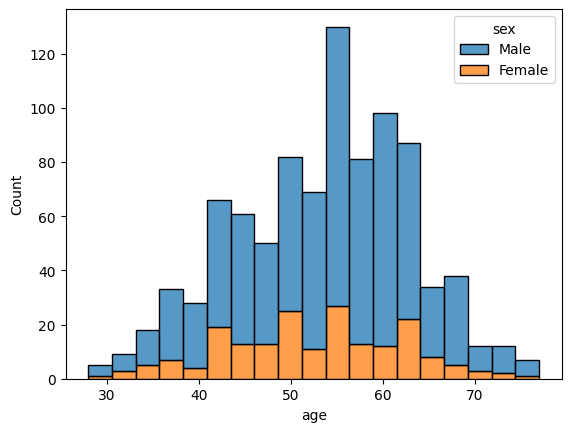

In [108]:

sns.histplot(x=df['age'], hue=df['sex'], multiple="stack")

In [109]:
df[df['sex'] == 'Male']['age'].mean()


53.78787878787879

In [110]:
df[df['sex'] == 'Female']['age'].mean()


52.47422680412371

In [112]:
df_cleaned = df.dropna(subset=['chol'])

In [113]:
df_cleaned['chol'].unique

<bound method Series.unique of 0      233.0
1      286.0
2      229.0
3      250.0
4      204.0
       ...  
915    333.0
916    139.0
917    223.0
918    385.0
919    254.0
Name: chol, Length: 920, dtype: float64>

In [117]:
df.chol.value_counts()

chol
0.0      172
223.0     39
220.0     10
254.0     10
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [118]:
# Remove rows with 0.0 in 'chol' column
df = df[df['chol'] != 0.0]


In [119]:
df.shape

(748, 13)

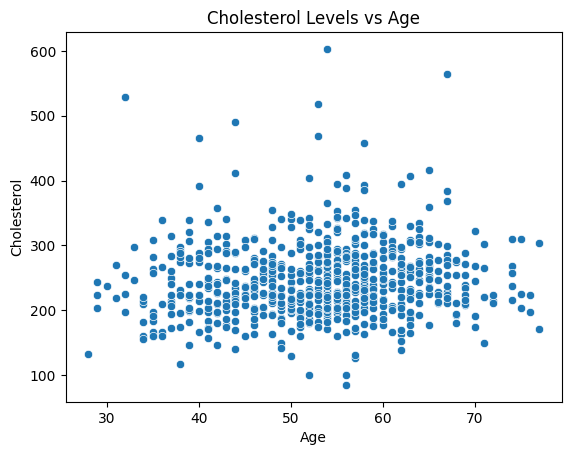

In [122]:
sns.scatterplot(x=df['age'], y=df['chol'])
plt.title("Cholesterol Levels vs Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


In [111]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'num'],
      dtype='object')

In [126]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,1,lv hypertrophy,150.000000,0,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,0,lv hypertrophy,108.000000,1,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,0,lv hypertrophy,129.000000,1,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,0,normal,187.000000,0,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,0,lv hypertrophy,172.000000,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,1,st-t abnormality,154.000000,0,0.0,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,0,st-t abnormality,137.545665,0,0.5,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,1,st-t abnormality,100.000000,0,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,1,lv hypertrophy,137.545665,0,0.5,0


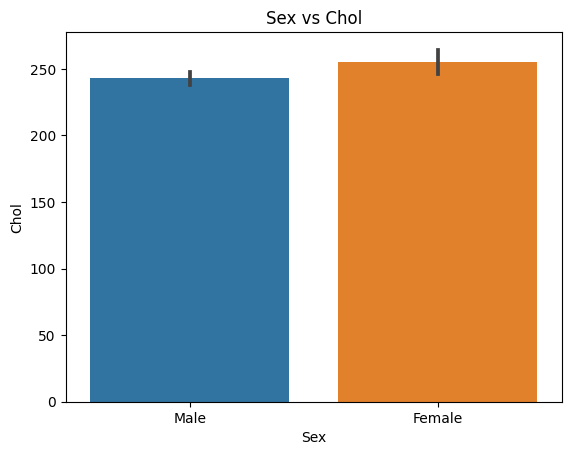

In [129]:
sns.barplot(x=df['sex'], y=df['chol'])
plt.title("Sex vs Chol")
plt.xlabel("Sex")
plt.ylabel("Chol")
plt.show()

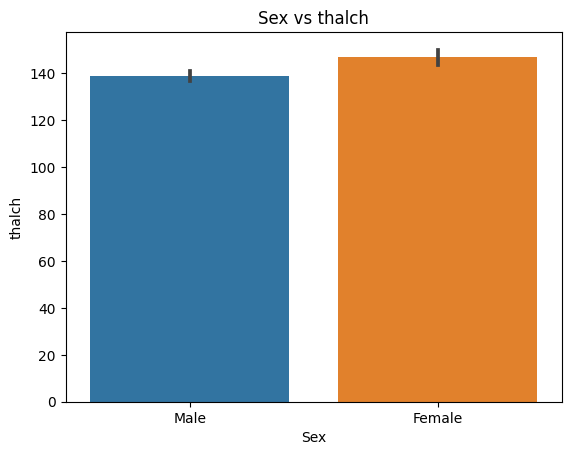

In [130]:
sns.barplot(x=df['sex'], y=df['thalch'])
plt.title("Sex vs thalch")
plt.xlabel("Sex")
plt.ylabel("thalch")
plt.show()

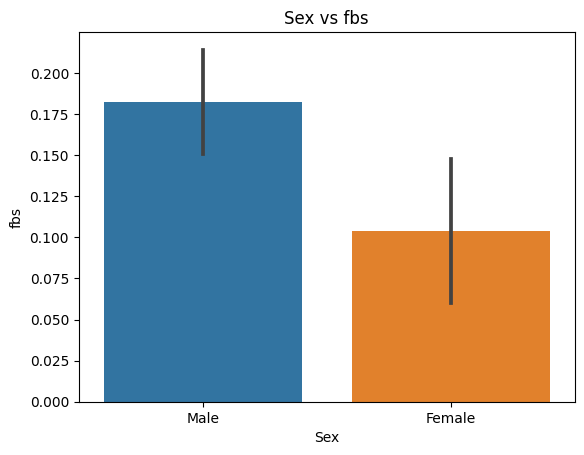

In [125]:
sns.barplot(x=df['sex'], y=df['fbs'])
plt.title("Sex vs fbs")
plt.xlabel("Sex")
plt.ylabel("fbs")
plt.show()